# Compile darknet YOLOv4

In [1]:
import os
if False:
    import tensorflow as tf
    if tf.test.gpu_device_name():
        print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))
    else:
        print("Please install GPU version of TF")
workingdir = os.getcwd()
darknetdir = os.path.join(workingdir,'darknet')
print(workingdir)
print(os.environ)

/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans
environ({'PATH': '/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/jupyterhub/bin:/usr/local/cuda/bin:/opt/conda/envs/python3_datascience_ready/bin', 'LANG': 'C.UTF-8', 'JUPYTERHUB_API_TOKEN': '5c63636df1994a039d68cd22946a9bfa', 'JPY_API_TOKEN': '5c63636df1994a039d68cd22946a9bfa', 'JUPYTERHUB_CLIENT_ID': 'jupyterhub-user-tj', 'JUPYTERHUB_HOST': '', 'JUPYTERHUB_OAUTH_CALLBACK_URL': '/user/tj/oauth_callback', 'JUPYTERHUB_USER': 'tj', 'JUPYTERHUB_SERVER_NAME': '', 'JUPYTERHUB_API_URL': 'http://127.0.0.1:8081/hub/api', 'JUPYTERHUB_ACTIVITY_URL': 'http://127.0.0.1:8081/hub/api/users/tj/activity', 'JUPYTERHUB_BASE_URL': '/', 'JUPYTERHUB_SERVICE_PREFIX': '/user/tj/', 'USER': 'tj', 'HOME': '/home/tj', 'SHELL': '/bin/bash', 'JPY_PARENT_PID': '2088', 'TERM': 'xterm-color', 'CLICOLOR': '1', 'PAGER': 'cat', 'GIT_PAGER': 'cat', 'MPLBACKEND': 'module://ipykernel.pylab.backend_inline'})


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd {darknetdir}
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/AVX=0/AVX=1/' Makefile
!sed -i 's/OPENMP=0/OPENMP=1/' Makefile
!sed -i 's/DEBUG=0/DEBUG=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2021 NVIDIA Corporation
Built on Mon_May__3_19:15:13_PDT_2021
Cuda compilation tools, release 11.3, V11.3.109
Build cuda_11.3.r11.3/compiler.29920130_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

# Training
./darknet detector train /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_w640h640_20210608/obj.data /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_w640h640_20210608/yolov4-tiny-obj.cfg /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/yolov4-tiny.conv.29 -dont_show -map -gpus 1

In [2]:
os.chdir(workingdir)
import copy, random, subprocess
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
import commonsettings

baseConfigFilenames = commonsettings.generatePaths(specificProjName = '3classbeans_yolo4tiny_filtered_w512h512_20210711')

trainingCommand = ["./darknet", 'detector', 'train',
                   baseConfigFilenames['objDataFileName']['display'],
                   baseConfigFilenames['modelCfgFileName']['display'],
                   baseConfigFilenames['pretrainedWeightFileName']['display'],
                   '-dont_show','-map','-gpus','0',
                   '>>', baseConfigFilenames['trainingRecordsFileName']['display'],
                  ]
continuousTrainingCommand = copy.deepcopy(trainingCommand)
continuousTrainingCommand[5] = baseConfigFilenames['backupLastWeightFileName']['display']
trainingCommand_str = " ".join(trainingCommand)
continuousTrainingCommand_str = " ".join(continuousTrainingCommand)
print(trainingCommand_str)
print(continuousTrainingCommand_str)

./darknet detector train /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210711/obj.data /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210711/yolov4-tiny-custom.cfg /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/yolov4-tiny.conv.29 -dont_show -map -gpus 0
./darknet detector train /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210711/obj.data /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210711/yolov4-tiny-custom.cfg /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_2021071

./darknet detector train /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4_filtered_densenet201_w512h512_20210617/obj.data /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4_filtered_densenet201_w512h512_20210617/densenet201_yolov4.cfg /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4_filtered_densenet201_w512h512_20210617/densenet201.weights -dont_show -map -gpus 0

In [18]:
#handling chart
from shutil import copyfile

yolov4ModelConfigStorePath = os.path.dirname(baseConfigFilenames['objDataFileName']['orig'])
#yolov4ModelCharts = [f for f in os.listdir(yolov4ModelConfigStorePath) if f.find(".png")!=-1]
trySaveChartN = 1
while True:
    checkIfChartSavedFileName = 'chart'+'{0:02d}'.format(trySaveChartN)+'.png'
    checkIfChartSavedFilePath = os.path.join(yolov4ModelConfigStorePath, checkIfChartSavedFileName)
    if os.path.isfile(checkIfChartSavedFilePath):
        print("skipping "+checkIfChartSavedFilePath)
        trySaveChartN += 1
    else:
        print("檔案未存在，存檔為。"+checkIfChartSavedFileName)
        copyfile(os.path.join(darknetdir, 'chart.png'), checkIfChartSavedFilePath)
        break

skipping /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210618/chart01.png
檔案未存在，存檔為。chart02.png


In [ ]:
%cd {darknetdir}
!{trainingCommand_str}

 total_bbox = 873, rewritten_bbox = 1.145475 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 545.985596, iou_loss = 0.000000, total_loss = 545.985596 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.296582), count: 125, class_loss = 1813.044189, iou_loss = 85.249512, total_loss = 1898.293701 
 total_bbox = 998, rewritten_bbox = 1.002004 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 559.101440, iou_loss = 0.000000, total_loss = 559.101440 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 37 Avg (IOU: 0.311379), count: 339, class_loss = 1867.959595, iou_loss = 176.663696, total_loss = 2044.623291 
 total_bbox = 1337, rewritten_bbox = 0.747943 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 30 Avg (IOU: 0.000000), count: 1, class_loss = 553.809692, iou_loss = 0.000000, total_los

# Test prediction

In [15]:
testPredictImage = random.choice(baseConfigFilenames['allTakenImages']['display'])

testProcessPredictRunCommand = copy.deepcopy(trainingCommand)
testProcessPredictRunCommand[2] = 'test'
testProcessPredictRunCommand.append(testPredictImage)
testProcessPredictRunCommand[4] = baseConfigFilenames['modelCfgFileNameInTesting']['orig']
testProcessPredictRunCommand[5] = baseConfigFilenames['backupBestWeightFileName']['orig']
testProcessPredictRunCommand_str = " ".join(testProcessPredictRunCommand)
print(testProcessPredictRunCommand_str)
#!./darknet detector test cfg/coco.data cfg/yolov4.cfg yolov4.weights data/person.jpg

./darknet detector test /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210618/obj.data /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210618/yolov4-tiny-custom-test.cfg /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/backup/3classbeans_yolo4tiny_filtered_w512h512_20210618/yolov4-tiny-custom_best.weights -dont_show -map -gpus 0 /opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0648.jpg


/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet
 DEBUG=1 
 CUDA-version: 11030 (11030), cuDNN: 8.2.0, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 4.2.0d
0
 0 : compute_capability = 370, cudnn_half = 0, GPU: NVIDIA Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 2    512 x 512 x   3 ->  256 x 256 x  32 0.113 BF
   1 conv     64       3 x 3/ 2    256 x 256 x  32 ->  128 x 128 x  64 0.604 BF
   2 conv     64       3 x 3/ 1    128 x 128 x  64 ->  128 x 128 x  64 1.208 BF
   3 route  2 		                       1/2 ->  128 x 128 x  32 
   4 conv     32       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  32 0.302 BF
   5 conv     32       3 x 3/ 1    128 x 128 x  32 ->  128 x 128 x  32 0.302 BF
   6 route  5 4 	                           ->  128 x 128

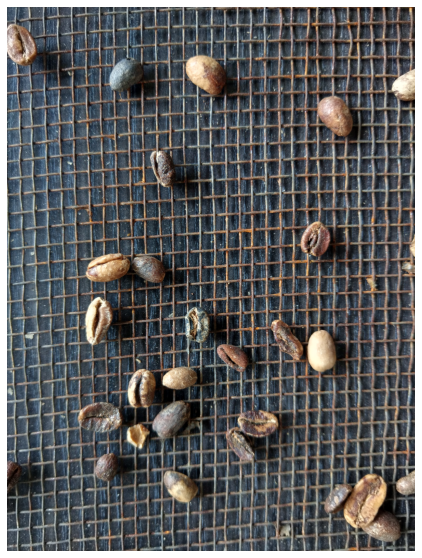

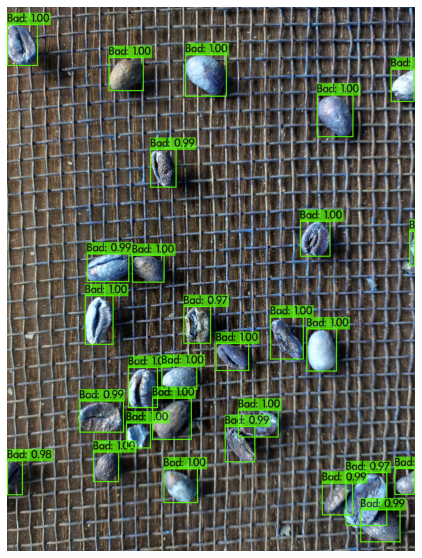

/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans


In [17]:
%cd {darknetdir}
!{testProcessPredictRunCommand_str}
commonsettings.imShow(testPredictImage, cvtColor=True)
commonsettings.imShow('predictions.jpg')
%cd {workingdir}

# Test Prediction in python

In [1]:
import os
from commonsettings import *
import random
import numpy as np
import time
import cv2
workingdir = os.getcwd()
darknetdir = os.path.join(workingdir,'darknet')
baseConfigFilenames = generatePaths()
os.chdir(darknetdir)
import darknet

In [ ]:
#import darknet_images
### baseConfigFilenames
network, class_names, class_colors = darknet.load_network(
        baseConfigFilenames['modelCfgFileNameInTesting']['orig'],
        baseConfigFilenames['objDataFileName']['orig'],
        baseConfigFilenames['backupBestWeightFileName']['orig'],
        batch_size=64
    )

In [ ]:
def image_detection(image_path, network, class_names, class_colors, thresh):
    # Darknet doesn't accept numpy images.
    # Create one with image we reuse for each detect
    width = darknet.network_width(network)
    height = darknet.network_height(network)
    darknet_image = darknet.make_image(width, height, 3)
    
    isfile = False if str(type(image_path)).find("ndarray")!=-1 else True
    image = cv2.imread(image_path) if isfile else image_path
    origShape = image.shape
    
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_resized = cv2.resize(image_rgb, (width, height),
                               interpolation=cv2.INTER_LINEAR)

    darknet.copy_image_from_bytes(darknet_image, image_resized.tobytes())
    detections = darknet.detect_image(network, class_names, darknet_image, thresh=thresh)
    #label, confidence, bbox(x_center, y_center, w, h)
    scaleXfactor = 1/width*origShape[1]
    scaleYfactor = 1/height*origShape[0]
    detectionsAdjusted = []
    for detection in detections:
        label, confidence, bbox = detection
        x_center, y_center, w, h = bbox
        left = int(round(x_center - (w / 2)))/origShape[1]*100
        top = int(round(y_center - (h / 2)))/origShape[0]*100
        w = w/width*100
        h = h/height*100
        detectionsAdjusted.append( {'label':label, 'confidence':confidence, 'bbox':[left,top,w,h] } )
    darknet.free_image(darknet_image)
    image = darknet.draw_boxes(detections, image_resized, class_colors)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    #return cv2.cvtColor(image, cv2.COLOR_BGR2RGB), detections, (width, height)
    returnDict = {'detections':detections, 'detectionsAdjusted':detectionsAdjusted, 'shape':(width, height), 'origshape':origShape}
    returnDict['image'] = image
    return returnDict

argThresh = 0.25

with open(os.path.join(workingdir,'labelstudioMLSimulateInput.json'), 'r') as fp:
    requestsdata = json.load(fp)
    tasks = requestsdata['tasks']

results = []

for task in tasks:
    sendInImg = task['data']['image'] #random.choice(baseConfigFilenames['allTakenImages']['display'])
    sendInImg = os.path.basename(task['data']['image'])
    sendInImg = [f for f in baseConfigFilenames['allTakenImages']['orig'] if f.find(sendInImg)!=-1][0]
    image_name = sendInImg
    image = cv2.imread(image_name)
    detectionsResult = image_detection(
                image, network, class_names, class_colors, argThresh
                )
    rectanglePredResults = detectionsResult['detectionsAdjusted']
    rectangles = []
    for key,rectanglePredResult in enumerate(rectanglePredResults):
        rectangles.append(
                    {
                        'original_width': detectionsResult['shape'][0],
                        'original_height': detectionsResult['shape'][1],
                        'image_rotation': 0,
                        'value': {
                            'x': rectanglePredResult['bbox'][0],
                            'y': rectanglePredResult['bbox'][1],
                            'width': rectanglePredResult['bbox'][2],
                            'height': rectanglePredResult['bbox'][3],
                            'rotation': 0,
                            'rectanglelables': ['UnlabelledBean'], #rectanglePredResult['label']
                            'confidence': rectanglePredResult['confidence']
                        },
                        'id': '',
                        'from_name': '',
                        'to_name': '',
                        'type': 'rectanglelabels'
                    })
    results.append({
        'result': rectangles
    })
    #display(detectionsResult['detectionsAdjusted'])
    #imShow(detectionsResult['image'])
display(results)

In [3]:
import os
display(os.environ)
os.environ['DARKNET_PATH'] = '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet'
from darknet import darknet

environ{'PATH': '/bin:/usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/opt/jupyterhub/bin:/usr/local/cuda/bin',
        'LANG': 'C.UTF-8',
        'JUPYTERHUB_API_TOKEN': 'c518f8ec2e824295a33cd181c382b97a',
        'JPY_API_TOKEN': 'c518f8ec2e824295a33cd181c382b97a',
        'JUPYTERHUB_CLIENT_ID': 'jupyterhub-user-tj',
        'JUPYTERHUB_HOST': '',
        'JUPYTERHUB_OAUTH_CALLBACK_URL': '/user/tj/oauth_callback',
        'JUPYTERHUB_USER': 'tj',
        'JUPYTERHUB_SERVER_NAME': '',
        'JUPYTERHUB_API_URL': 'http://127.0.0.1:8081/hub/api',
        'JUPYTERHUB_ACTIVITY_URL': 'http://127.0.0.1:8081/hub/api/users/tj/activity',
        'JUPYTERHUB_BASE_URL': '/',
        'JUPYTERHUB_SERVICE_PREFIX': '/user/tj/',
        'USER': 'tj',
        'HOME': '/home/tj',
        'SHELL': '/bin/bash',
        'JPY_PARENT_PID': '10726',
        'TERM': 'xterm-color',
        'CLICOLOR': '1',
        'PAGER': 'cat',
        'GIT_PAGER': 'cat',
        'MPLBACKEND': 'module://ipykernel.pylab.

In [4]:
sendInImg = 'good-IMG_6402.JPG'
[f for f in baseConfigFilenames['allTakenImages']['orig'] if f.find(sendInImg)!=-1]
baseConfigFilenames['allTakenImages']['orig']

['/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0605.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0606.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0607.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0608.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0609.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0610.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0611.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c68b6/Users/Jerry.Hsieh/coffeebeans/darknet/data/obj/bad-IMAG0612.jpg',
 '/opt/mnt/code-391ff5ac-6576-460f-ba4d-7e03433c